In [1]:
import pandas as pd
import re
import numpy as np 
import pandas as pd 
import csv
import re, string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('TrafficAttackFDI.csv',parse_dates=True, sep=';')
data.head(-1)

,source,destination,gooseid,time,stNum,sqNum,gooseboolean,goosebitstring,label
0,b4:b1:5a:0a:b4:ef,01:0c:cd:01:00:09,SIP/VI3p1_27Undervoltage1/LLN0/Control_DataSet,"Jun 16, 2022 21:18:07.021625697 UTC",2100,102,0,0,0
1,b4:b1:5a:0a:b4:ef,01:0c:cd:01:00:09,SIP/VI3p1_27Undervoltage1/LLN0/Control_DataSet,"Jun 16, 2022 21:18:07.021625697 UTC",2100,103,0,0,0
2,b4:b1:5a:0a:b4:ef,01:0c:cd:01:00:09,SIP/VI3p1_27Undervoltage1/LLN0/Control_DataSet,"Jun 16, 2022 21:18:07.021625697 UTC",2100,104,0,0,0
3,b4:b1:5a:0a:b4:ef,01:0c:cd:01:00:09,SIP/VI3p1_27Undervoltage1/LLN0/Control_DataSet,"Jun 16, 2022 21:18:07.021625697 UTC",2100,105,0,0,0
4,b4:b1:5a:0a:b4:ef,01:0c:cd:01:00:09,SIP/VI3p1_27Undervoltage1/LLN0/Control_DataSet,"Jun 16, 2022 21:18:07.021625697 UTC",2100,106,0,0,0
...,...,...,...,...,...,...,...,...,...
11117,b4:b1:5a:0a:b4:ef,01:0c:cd:01:00:09,SIP/VI3p1_27Undervoltage1/LLN0/Control_DataSet,"Dec 6, 2022 13:51:12.049558103 UTC",160,500,0,0,1
11118,b4:b1:5a:0a:b4:ef,01:0c:cd:01:00:09,SIP/VI3p1_27Undervoltage1/LLN0/Control_DataSet,"Dec 6, 2022 13:51:12.049558103 UTC",160,500,0,0,1
11119,b4:b1:5a:0a:b4:ef,01:0c:cd:01:00:09,SIP/VI3p1_27Undervoltage1/LLN0/Control_DataSet,"Dec 6, 2022 13:51:12.049558103 UTC",160,500,0,0,1
11120,b4:b1:5a:0a:b4:ef,01:0c:cd:01:00:09,SIP/VI3p1_27Undervoltage1/LLN0/Control_DataSet,"Dec 6, 2022 13:51:12.049558103 UTC",160,500,0,0,1


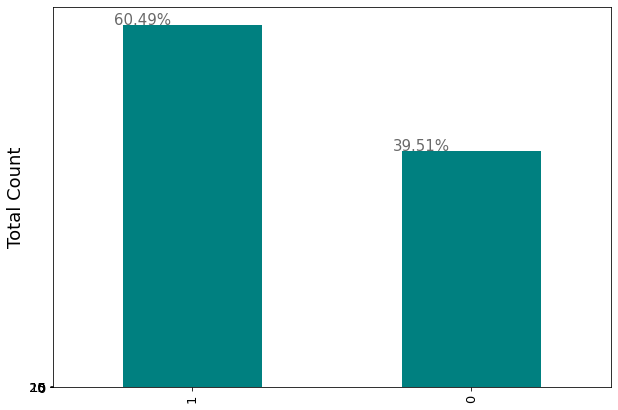

In [3]:
ax = data['label'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="teal", fontsize=13);
ax.set_alpha(0.8)

ax.set_ylabel("Total Count", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

In [4]:
import pickle
from sklearn import tree

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import logging

In [5]:
data.columns

Index(['source', 'destination', 'gooseid', 'time', 'stNum', 'sqNum',
       'gooseboolean', 'goosebitstring', 'label'],
      dtype='object')

In [6]:
input_data = data[['stNum','sqNum']]

In [7]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(input_data, data['label'], test_size=0.2, random_state=200)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8898, 2) (2225, 2) (8898,) (2225,)


lr : 1.0

Classification Report: 
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       866
  FDI Attack       1.00      1.00      1.00      1359

    accuracy                           1.00      2225
   macro avg       1.00      1.00      1.00      2225
weighted avg       1.00      1.00      1.00      2225


[[ 866    0]
 [   0 1359]]


<ipython-input-8-091eb94b77c9>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + original_labels, rotation=90)
<ipython-input-8-091eb94b77c9>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + original_labels)


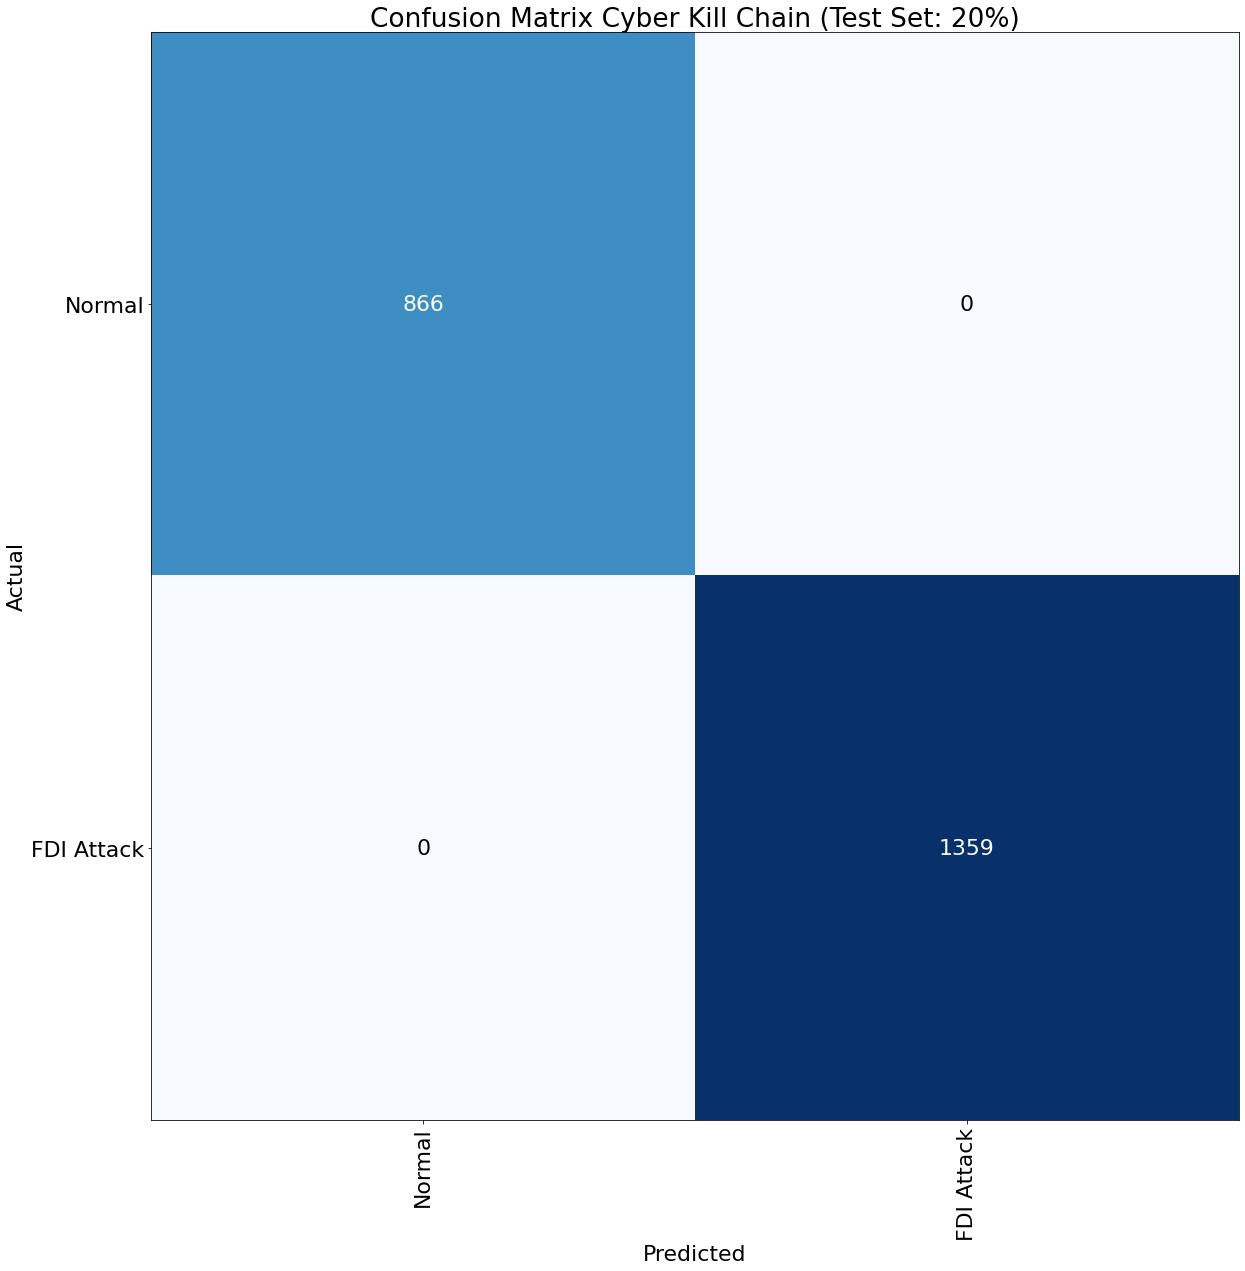

mnb : 0.7631460674157303

Classification Report: 
               precision    recall  f1-score   support

      Normal       1.00      0.39      0.56       866
  FDI Attack       0.72      1.00      0.84      1359

    accuracy                           0.76      2225
   macro avg       0.86      0.70      0.70      2225
weighted avg       0.83      0.76      0.73      2225


[[ 339  527]
 [   0 1359]]


<ipython-input-8-091eb94b77c9>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + original_labels, rotation=90)
<ipython-input-8-091eb94b77c9>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + original_labels)


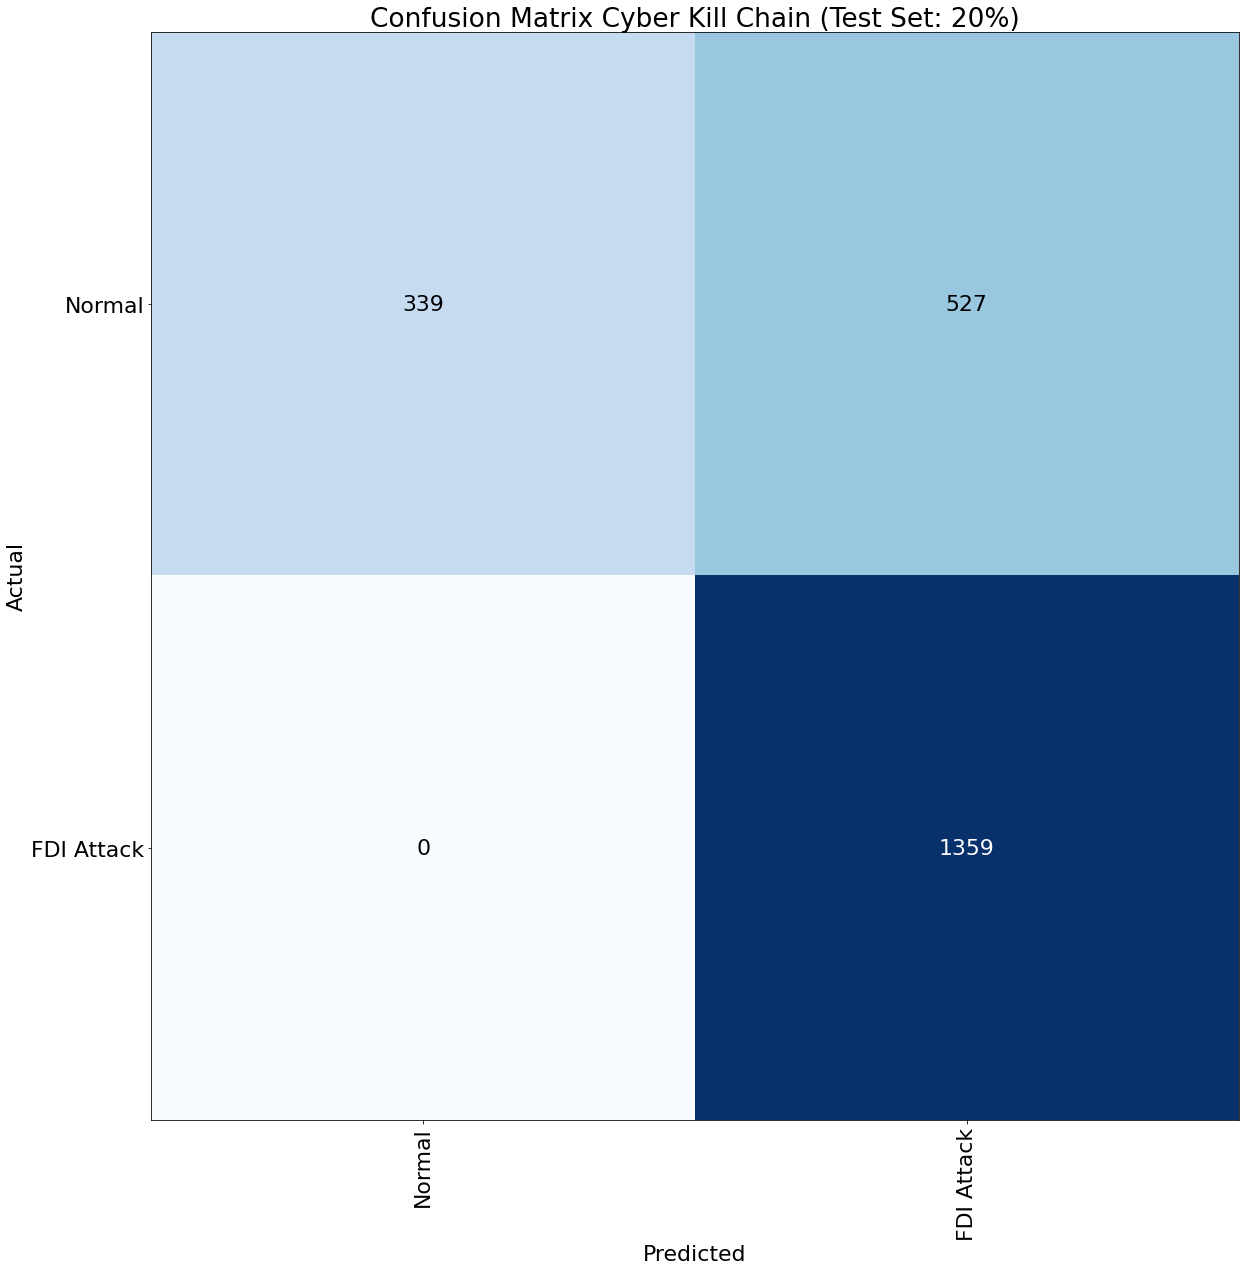

rfc : 1.0

Classification Report: 
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       866
  FDI Attack       1.00      1.00      1.00      1359

    accuracy                           1.00      2225
   macro avg       1.00      1.00      1.00      2225
weighted avg       1.00      1.00      1.00      2225


[[ 866    0]
 [   0 1359]]


<ipython-input-8-091eb94b77c9>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + original_labels, rotation=90)
<ipython-input-8-091eb94b77c9>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + original_labels)


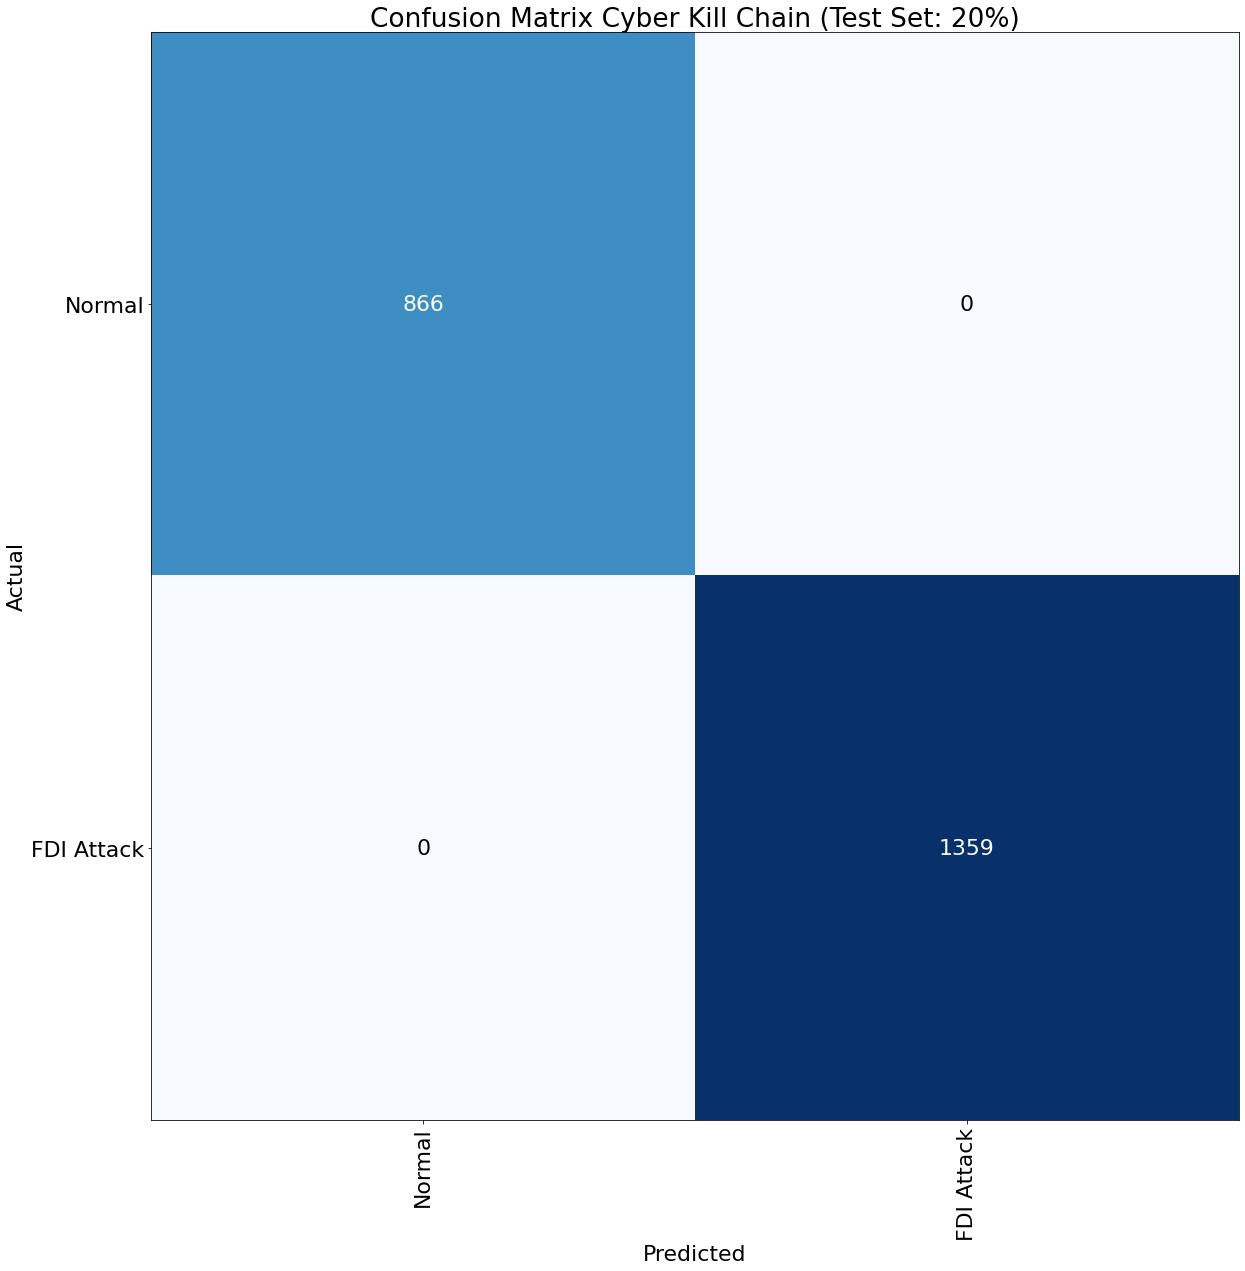

In [8]:
import numpy as num
import matplotlib.pyplot as plot
plot.rcParams.update({'font.size': 22})
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

original_labels = ['Normal','FDI Attack']

clfs = {
        'lr': LogisticRegression(), 
        'mnb': MultinomialNB(),   
        'rfc': RandomForestClassifier() 
               
       }


def test_clf(clf_dict, Xtrain, ytrain, Xtest, ytest):
    for clf_name, clf in clf_dict.items():
        clf.fit(Xtrain, ytrain)
        predicted = clf.predict(Xtest)
        print(clf_name,":",np.mean(predicted == ytest))
        print()
        print("Classification Report: \n",classification_report(ytest, predicted, target_names = original_labels))
        print() 
        cm = confusion_matrix(ytest, predicted)
        print(cm)
        fig, ax = plot_confusion_matrix(conf_mat = cm)
        plt.title('Confusion Matrix Cyber Kill Chain (Test Set: 20%)')
        fig.set_size_inches(20,20)
        ax.set_xticklabels([''] + original_labels, rotation=90)
        ax.set_yticklabels([''] + original_labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
      
       
        
        
        
test_clf(clfs, X_train, y_train, X_test, y_test)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svm : 1.0

Classification Report: 
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       866
  FDI Attack       1.00      1.00      1.00      1359

    accuracy                           1.00      2225
   macro avg       1.00      1.00      1.00      2225
weighted avg       1.00      1.00      1.00      2225


[[ 866    0]
 [   0 1359]]


<ipython-input-8-091eb94b77c9>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + original_labels, rotation=90)
<ipython-input-8-091eb94b77c9>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + original_labels)


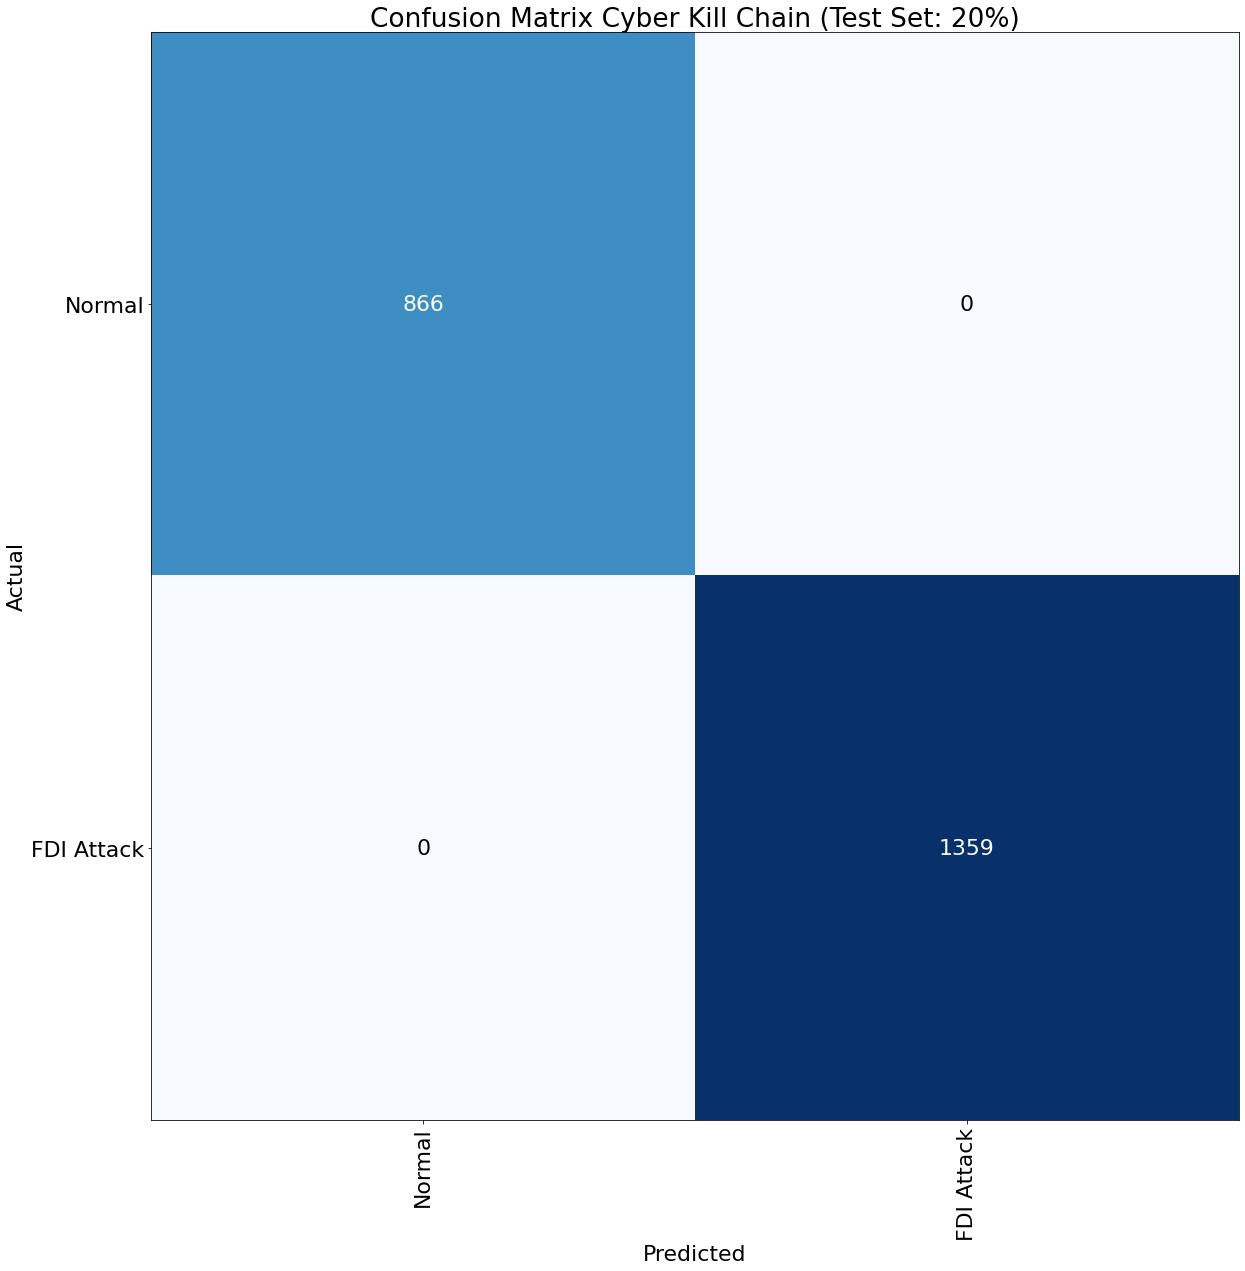

In [10]:
clf = {
        'svm': SVC(kernel = 'linear', probability = True)
         
       }


      
        
        
test_clf(clf, X_train, y_train, X_test, y_test)